In [7]:
import pandas as pd
import numpy as np
import pymc3 as pm
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats, optimize
import random
# import wbdata as wb

plt.style.use('seaborn')
%matplotlib inline

## Adverse Selection
https://janboone.github.io/applied-economics/pagescreencasts.html#org5335ad5

In [26]:
income = 1.1
cost = 1
ρ = 0.1

def u(x):
    #utility funciton
    return x**ρ

number_of_agents = 50

# Probability of risk that consumers run in buying insurance
# We use the uniform distribution so probabilities between 0 and 1
π = pm.Uniform.dist(0.0,1.0).random(size = number_of_agents)
π.sort() # first element is the lowest probability of incurring costs c

def insurance_supply(Q):
    return np.mean(π[-Q:])*cost

def insurance_demand(sigma):
    # Function of /sigma premium
    # total demand of insurance
    return np.sum((u(income-sigma) > π*u(income-cost) + (1-π)*u(income)))
#     u(income−σ)>πu(income−cost)+(1−π)u(income)

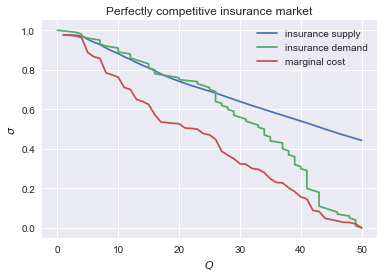

In [27]:
range_Q = np.arange(1,number_of_agents+1,1)
range_sigma = np.arange(0,1.01,0.01)
plt.plot(range_Q,[insurance_supply(Q) for Q in range_Q],label="insurance supply")
plt.plot([insurance_demand(sigma) for sigma in range_sigma],range_sigma,label="insurance demand")
plt.plot(range_Q,[π[-Q]*cost for Q in range_Q],label="marginal cost")
plt.legend()
plt.xlabel('$Q$')
plt.ylabel('$\sigma$')
plt.title('Perfectly competitive insurance market')
plt.show()

## Moral Hazard
x = gross income (productivity)

utility function

$u_i = \max_x (1-\tau)*x+\tau_0 - c_i x^{2}$

- $c_i$ cost level of the agent, is private information; government cannot make taxation policy based on this asymmetry of information 
- $x_i$ is observable by the government

effort cost is log-normally distributed
τ0 = marginal tax rate


In [28]:
number_of_agents = 200
effort_costs = pm.Lognormal.dist(mu=0.0,sd=0.5).random(size=number_of_agents)
def effort(c,τ):
    sol = optimize.minimize(lambda x: -(x*(1-τ)-c*x**2),1)
    return sol.x

In [29]:
def Welfare(τ,ρ):
    τ_0 = np.mean([τ*effort(c,τ) for c in effort_costs])
    return (np.sum([((1-τ)*effort(c,τ)+τ_0 - c*effort(c,τ)**2)**ρ for c in effort_costs]))**(1/ρ)
